In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns

%pylab inline

matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

Populating the interactive namespace from numpy and matplotlib


<div class="alert alert-warning">
<h3>Let's read in our data files for surface air temperature (TAS). We focus on using a consistent ensemble (#1) from CCSM4, but for varying representative concentration pathway (RCP) scenarios. These scenarios allow us to evaluate the different forcings from anthropogenic climate change.</h3>
</div>

In [2]:
### Read in data
directory = '/home/zlabe/Documents/Projects/NASASTEM_workshop2016/Data/'
data1 = Dataset(directory + 'tas_global_CCSM4_rcp26_1.nc')
lat = data1.variables['lat'][:]
lon = data1.variables['lon'][:]
tas26 = data1.variables['tas'][:]
data1.close()

data2 = Dataset(directory + 'tas_global_CCSM4_rcp45_1.nc')
tas45 = data2.variables['tas'][:]
data2.close()

data3 = Dataset(directory + 'tas_global_CCSM4_rcp85_1.nc')
tas85 = data3.variables['tas'][:]
data3.close()

In [3]:
### Create years array
years = np.arange(2006,2100+1,1)

### Create meshgrid of lats/lons
lons,lats = np.meshgrid(lon,lat)

### Reshape arrays into [year,month,lat,lon]
tas26 = np.reshape(tas26,(len(years),12,lat.shape[0],lon.shape[0]))
tas45 = np.reshape(tas45,(len(years),12,lat.shape[0],lon.shape[0]))
tas85 = np.reshape(tas85,(len(years),12,lat.shape[0],lon.shape[0]))

<div class="alert alert-warning">
<h3> We are interested in the change in temperature over the course of the model run (2006-2100). To evaluate this we begin with year initial (2006) and subtract it from year final (2100)</h3>
</div>

In [4]:
### Change in temperature from 2006 to 2100
change26 = tas26[-1,:,:] - tas26[0,:,:,:]
change45 = tas45[-1,:,:] - tas45[0,:,:,:]
change85 = tas85[-1,:,:] - tas85[0,:,:,:]

<div class="alert alert-warning">
<h3> Let's take a look at the zonally averaged change in temperature. Therefore, we are going to take the average across all longitudes. Our arrays will now be <code>[lat x month]</code>. We plot accordingly for each RCP model run. Limits with colorbars are standardized.</h3>
</div>

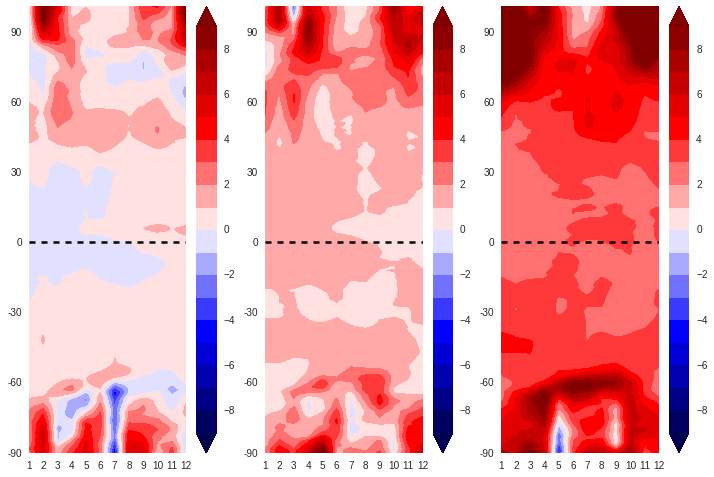

In [5]:
### Zonal changes
zchange26 = np.nanmean(change26,axis=2).transpose()
zchange45 = np.nanmean(change45,axis=2).transpose()
zchange85 = np.nanmean(change85,axis=2).transpose()

equator = [90]*zchange26.shape[1]

plt.figure()
plt.subplot(131)
plt.contourf(zchange26,np.arange(-9,10,1),cmap='seismic',extend='both')
plt.plot(equator,linestyle='--',linewidth=2.5,color='k')
plt.xticks(np.arange(0,12,1),map(str,(np.arange(1,13,1))))
plt.yticks(np.arange(0,181,30),map(str,(np.arange(-90,91,30))))
plt.colorbar()

plt.subplot(132)
plt.contourf(zchange45,np.arange(-9,10,1),cmap='seismic',extend='both')
plt.plot(equator,linestyle='--',linewidth=2.5,color='k')
plt.xticks(np.arange(0,12,1),map(str,(np.arange(1,13,1))))
plt.yticks(np.arange(0,181,30),map(str,(np.arange(-90,91,30))))
plt.colorbar()

plt.subplot(133)
plt.contourf(zchange85,np.arange(-9,10,1),cmap='seismic',extend='both')
plt.plot(equator,linestyle='--',linewidth=2.5,color='k')
plt.xticks(np.arange(0,12,1),map(str,(np.arange(1,13,1))))
plt.yticks(np.arange(0,181,30),map(str,(np.arange(-90,91,30))))
plt.colorbar()

plt.show()

<div class="alert alert-warning">
<h3>We now see that the change in temperature is greatest at the poles for each RCP scenario, and the greatest warming is found with RCP8.5.

How does this look globally?</h3>
</div>

RCP 2.6 Global Temperature Change = +0.75C
RCP 4.5 Global Temperature Change = +1.76C
RCP 8.5 Global Temperature Change = +4.43C
------------------------------------------


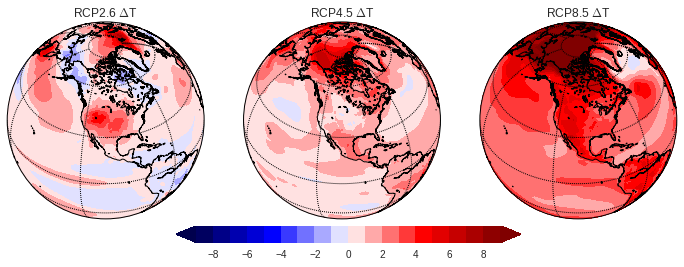

In [6]:
### Display total year changes
yrchange26 = np.nanmean(change26,axis=0)
yrchange45 = np.nanmean(change45,axis=0)
yrchange85 = np.nanmean(change85,axis=0)

fig = plt.figure()
m = Basemap(projection='ortho',lon_0=-105,lat_0=40,resolution='l')

ax1 = plt.subplot(131)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
cs1 = m.contourf(lons,lats,yrchange26,np.arange(-9,10,1),latlon=True,extend='both')
cs1.set_cmap('seismic')
plt.title(r'RCP2.6 $\Delta$T')

ax2 =plt.subplot(132)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
cs2 = m.contourf(lons,lats,yrchange45,np.arange(-9,10,1),latlon=True,extend='both')
cs2.set_cmap('seismic')
plt.title(r'RCP4.5 $\Delta$T')

ax3 =plt.subplot(133)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
cs3 = m.contourf(lons,lats,yrchange85,np.arange(-9,10,1),latlon=True,extend='both')
cs3.set_cmap('seismic')
plt.title(r'RCP8.5 $\Delta$T')

cbar_ax = fig.add_axes([0.32,0.3,0.4,0.03])                
cbar = fig.colorbar(cs3,cax=cbar_ax,orientation='horizontal',
                    extend='both',extendfrac=0.07,drawedges=True)

print 'RCP 2.6 Global Temperature Change = +%sC' % (np.round(np.nanmean(change26),2))
print 'RCP 4.5 Global Temperature Change = +%sC' % (np.round(np.nanmean(change45),2))
print 'RCP 8.5 Global Temperature Change = +%sC' % (np.round(np.nanmean(change85),2))
print '------------------------------------------'

<div class="alert alert-warning">
<h3> Finally, we focus on the change in temperature over time for each model scenario. It is important to keep in mind that we are working with unequal grid cells. For purposes of simplification in this example, we will ignore equal weighting. Therefore, the following values are <i>overestimates</i> as they are weighted too heavily in the poles (where grid cell areas are smaller).</h3>
</div>

RCP 2.6 Initial Global Mean Temperature = 278.29K
RCP 4.5 Initial Global Mean Temperature = 278.32K
RCP 8.5 Initial Global Mean Temperature = 278.24K
------------------------------------------------
RCP 2.6 Final Global Mean Temperature = 279.04K
RCP 4.5 Final Global Mean Temperature = 280.07K
RCP 8.5 Final Global Mean Temperature = 282.67K
------------------------------------------------


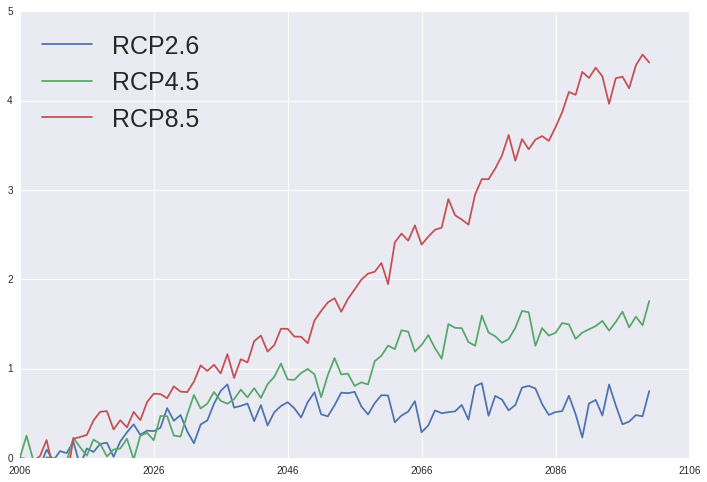

In [7]:
### Temperature Change Over Time
itas26 = np.nanmean(np.nanmean(np.nanmean(tas26[0],axis=1),axis=1))
fitas26 = np.nanmean(np.nanmean(np.nanmean(tas26[-1],axis=1),axis=1))
ftas26 = np.nanmean(np.nanmean(np.nanmean(tas26,axis=1),axis=1),axis=1)

itas45 = np.nanmean(np.nanmean(np.nanmean(tas45[0],axis=1),axis=1))
fitas45 = np.nanmean(np.nanmean(np.nanmean(tas45[-1],axis=1),axis=1))
ftas45 = np.nanmean(np.nanmean(np.nanmean(tas45,axis=1),axis=1),axis=1)

itas85 = np.nanmean(np.nanmean(np.nanmean(tas85[0],axis=1),axis=1))
fitas85 = np.nanmean(np.nanmean(np.nanmean(tas85[-1],axis=1),axis=1))
ftas85 = np.nanmean(np.nanmean(np.nanmean(tas85,axis=1),axis=1),axis=1)

delta26 = ftas26 - itas26
delta45 = ftas45 - itas45
delta85 = ftas85 - itas85

fig = plt.figure()
plt.plot(delta26,label='RCP2.6')
plt.plot(delta45,label='RCP4.5')
plt.plot(delta85,label='RCP8.5')

plt.ylim([0,5])
plt.xticks(np.arange(0,101,20),map(str,np.arange(2006,2107,20)))

plt.legend(loc='upper left',fontsize=25)

print 'RCP 2.6 Initial Global Mean Temperature = %sK' % np.round(itas26,2)
print 'RCP 4.5 Initial Global Mean Temperature = %sK' % np.round(itas45,2)
print 'RCP 8.5 Initial Global Mean Temperature = %sK' % np.round(itas85,2)
print '------------------------------------------------'

print 'RCP 2.6 Final Global Mean Temperature = %sK' % np.round(fitas26,2)
print 'RCP 4.5 Final Global Mean Temperature = %sK' % np.round(fitas45,2)
print 'RCP 8.5 Final Global Mean Temperature = %sK' % np.round(fitas85,2)
print '------------------------------------------------'